In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be60b321dbc4a339efdcd2e1cebb1f02


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vanimo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | huarmey
Processing Record 7 of Set 1 | merauke
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | solnechnyy
Processing Record 11 of Set 1 | uige
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | kokstad
Processing Record 15 of Set 1 | jacqueville
Processing Record 16 of Set 1 | rocha
Processing Record 17 of Set 1 | katangli
Processing Record 18 of Set 1 | ayorou
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | bayan
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | hobart
Processing Record 24 of 

Processing Record 39 of Set 4 | lensk
Processing Record 40 of Set 4 | olinda
Processing Record 41 of Set 4 | yumen
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | baruun-urt
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | mitsamiouli
Processing Record 47 of Set 4 | redmond
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | avarua
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | clyde
Processing Record 3 of Set 5 | reitz
Processing Record 4 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | akureyri
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | turukhansk
Processing Record 10 of Set 5 | bethel
Processing Record 11 of Set 5 | clyde river
Processing Record

Processing Record 25 of Set 8 | saint-pierre
Processing Record 26 of Set 8 | nador
Processing Record 27 of Set 8 | sicuani
Processing Record 28 of Set 8 | hokitika
Processing Record 29 of Set 8 | comodoro rivadavia
Processing Record 30 of Set 8 | mogadishu
Processing Record 31 of Set 8 | curuguaty
Processing Record 32 of Set 8 | rong kwang
Processing Record 33 of Set 8 | homorod-de jos
City not found. Skipping...
Processing Record 34 of Set 8 | faya
Processing Record 35 of Set 8 | channel-port aux basques
Processing Record 36 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 37 of Set 8 | komadi
Processing Record 38 of Set 8 | araouane
Processing Record 39 of Set 8 | killybegs
Processing Record 40 of Set 8 | goure
Processing Record 41 of Set 8 | pokhara
Processing Record 42 of Set 8 | javanrud
Processing Record 43 of Set 8 | lac du bonnet
Processing Record 44 of Set 8 | ostrovnoy
Processing Record 45 of Set 8 | inuvik
Processing Record 46 of Set 8 | great falls
Proce

Processing Record 8 of Set 12 | noumea
Processing Record 9 of Set 12 | talcahuano
Processing Record 10 of Set 12 | balykshi
Processing Record 11 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 12 | kununurra
Processing Record 13 of Set 12 | rajauri
Processing Record 14 of Set 12 | san patricio
Processing Record 15 of Set 12 | broadford
Processing Record 16 of Set 12 | maningrida
Processing Record 17 of Set 12 | sainte-suzanne
Processing Record 18 of Set 12 | itaueira
Processing Record 19 of Set 12 | ukiah
Processing Record 20 of Set 12 | cardston
Processing Record 21 of Set 12 | raudeberg
Processing Record 22 of Set 12 | fukue
Processing Record 23 of Set 12 | bambanglipuro
Processing Record 24 of Set 12 | suntar
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | zelenets
Processing Record 27 of Set 12 | mana
Processing Record 28 of Set 12 | nalut
Processing Record 29 of Set 12 | semey
Processing Record 30 of Set 12 | umm

In [10]:
len(city_data)

529

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vanimo,-2.6741,141.3028,79.61,84,63,2.55,PG,2021-05-28 13:21:35
1,Rikitea,-23.1203,-134.9692,72.34,67,56,11.25,PF,2021-05-28 13:21:17
2,Hermanus,-34.4187,19.2345,68.81,77,19,21.72,ZA,2021-05-28 13:21:35
3,Port Alfred,-33.5906,26.8910,69.84,55,0,21.81,ZA,2021-05-28 13:17:24
4,Punta Arenas,-53.1500,-70.9167,35.62,86,40,19.66,CL,2021-05-28 13:18:04
5,Huarmey,-10.0681,-78.1522,67.05,91,90,5.44,PE,2021-05-28 13:21:36
6,Merauke,-8.4667,140.3333,76.86,86,68,15.48,ID,2021-05-28 13:21:36
7,Ushuaia,-54.8000,-68.3000,29.86,93,75,23.02,AR,2021-05-28 13:20:04
8,Chuy,-33.6971,-53.4616,60.75,70,29,8.99,UY,2021-05-28 13:21:37
9,Solnechnyy,50.7214,136.6319,48.43,80,92,2.04,RU,2021-05-28 13:21:37


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_reordered = city_data_df[new_column_order]
city_data_reordered.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vanimo,PG,2021-05-28 13:21:35,-2.6741,141.3028,79.61,84,63,2.55
1,Rikitea,PF,2021-05-28 13:21:17,-23.1203,-134.9692,72.34,67,56,11.25
2,Hermanus,ZA,2021-05-28 13:21:35,-34.4187,19.2345,68.81,77,19,21.72
3,Port Alfred,ZA,2021-05-28 13:17:24,-33.5906,26.8910,69.84,55,0,21.81
4,Punta Arenas,CL,2021-05-28 13:18:04,-53.1500,-70.9167,35.62,86,40,19.66
5,Huarmey,PE,2021-05-28 13:21:36,-10.0681,-78.1522,67.05,91,90,5.44
6,Merauke,ID,2021-05-28 13:21:36,-8.4667,140.3333,76.86,86,68,15.48
7,Ushuaia,AR,2021-05-28 13:20:04,-54.8000,-68.3000,29.86,93,75,23.02
8,Chuy,UY,2021-05-28 13:21:37,-33.6971,-53.4616,60.75,70,29,8.99
9,Solnechnyy,RU,2021-05-28 13:21:37,50.7214,136.6319,48.43,80,92,2.04


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/28/21'

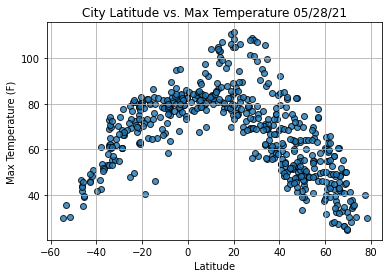

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

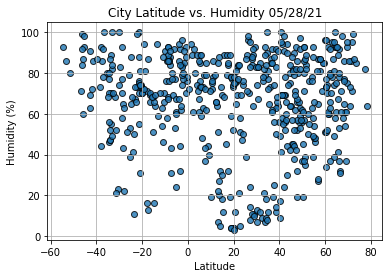

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

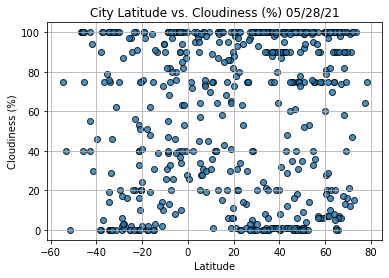

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

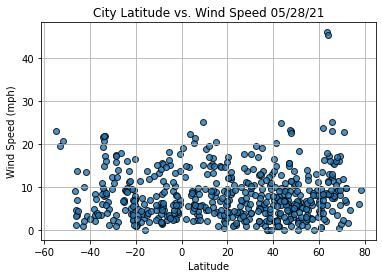

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [172]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.text(0.6, 0.5, 'R = %0.2f' % r_value)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [173]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
9,Solnechnyy,50.7214,136.6319,48.43,80,92,2.04,RU,2021-05-28 13:21:37
11,Saskylakh,71.9167,114.0833,38.05,71,47,6.51,RU,2021-05-28 13:21:38
14,Jacqueville,5.2052,-4.4146,89.51,76,34,8.75,CI,2021-05-28 13:21:39
16,Katangli,51.7102,143.2326,37.69,84,100,6.55,RU,2021-05-28 13:21:40
17,Ayorou,14.7308,0.9174,106.88,18,58,8.01,NE,2021-05-28 13:21:40


In [174]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

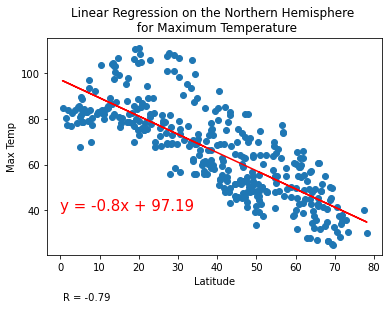

In [175]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,40))

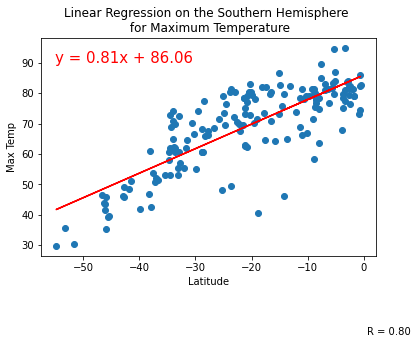

In [176]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

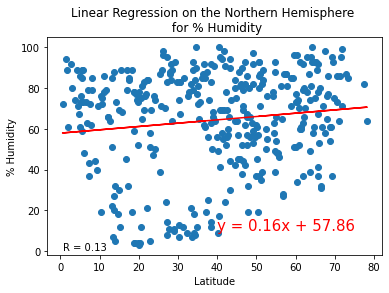

In [177]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

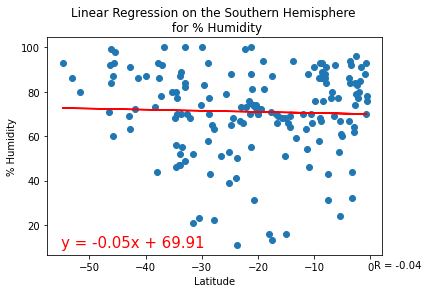

In [178]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,10))

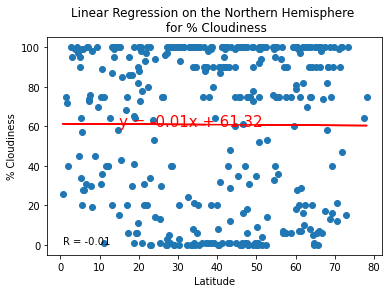

In [179]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(15,60))

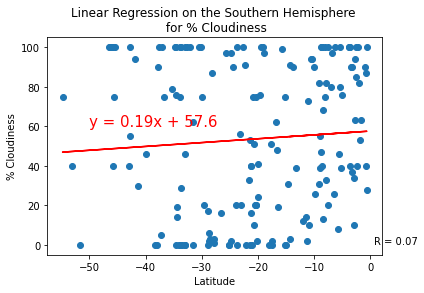

In [180]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

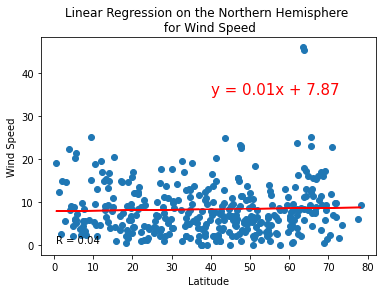

In [182]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

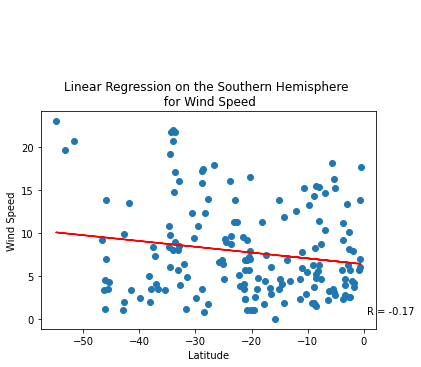

In [183]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))